### [Market Segment]: Notebook 1 - Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import os
from scipy import stats
from collections import Counter
import matplotlib
matplotlib.use('agg')
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

pd.set_option('display.width', 1000)

import seaborn as sns
color = sns.color_palette()
sns.set(style="whitegrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('marketing_data.csv')


In [3]:
data.rename(columns={' Income ':'Income'},inplace=True)
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%m/%d/%y')  
data["Income"] = data["Income"].str.replace("$","").str.replace(",","") 
data["Income"] = data["Income"].astype(float)

In [4]:
print("data shape",data.shape)

data shape (2240, 28)


In [5]:
data.head().T

,0,1,2,3,4
ID,1826,1,10476,1386,5371
Year_Birth,1970,1961,1958,1967,1989
Education,Graduation,Graduation,Graduation,Graduation,Graduation
Marital_Status,Divorced,Single,Married,Together,Single
Income,84835.0,57091.0,67267.0,32474.0,21474.0
Kidhome,0,0,0,1,1
Teenhome,0,0,1,1,0
Dt_Customer,2014-06-16 00:00:00,2014-06-15 00:00:00,2014-05-13 00:00:00,2014-05-11 00:00:00,2014-04-08 00:00:00
Recency,0,0,0,0,0
MntWines,189,464,134,10,6


### Starting EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.nunique() 


ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [9]:
#dropping ID column
data.drop(['ID'],axis=1,inplace =True)


In [10]:
#checking Duplicate values
duplicate = data[data.duplicated(subset=None,keep='first')] 
print("Duplicate Rows {}".format(duplicate.shape))

Duplicate Rows (47, 27)


In [11]:
data= data.drop_duplicates() 

In [12]:
data.shape

(2193, 27)

<AxesSubplot:>

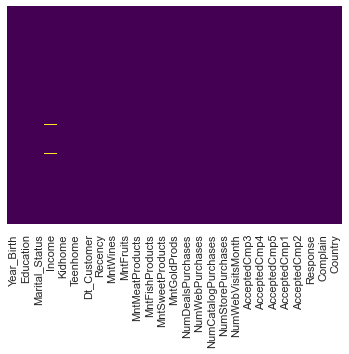

In [13]:
#checking Null values
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis',cbar=False)


In [14]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

#### Insights

### One column have null values. Imputation required for:
#### 1. Income 

**Median Imputation for Income Column**

<AxesSubplot:xlabel='Income', ylabel='Density'>

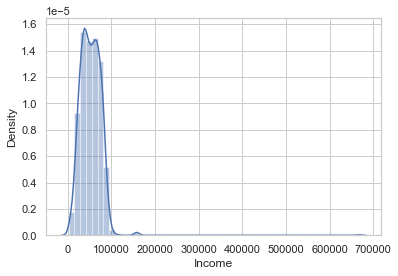

In [15]:
sns.distplot(data["Income"])

In [16]:

data["Income"].fillna(value=data["Income"].median(),inplace=True)

In [17]:
data.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [18]:
# split columns based on datatype
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# numericdata = data.select_dtypes(include=numerics)
# numerical_col=numericdata.columns
# print(numerical_col)
# categorical_col=list(set(data.columns)-set(numerical_col))
# print(categorical_col)

In [19]:
df_cat = data.loc[:,data.dtypes==np.object]
cat_num = ['Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain']
df_cat_num = data[cat_num]
num = ['Year_Birth','Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df_num = data[num]

In [20]:
#Unique values in categorical data
for x in df_cat.columns:
    print("Unique values in {} are \n{}".format(x,df_cat[x].value_counts()))

Unique values in Education are 
Graduation    1101
PhD            475
Master         366
2n Cycle       197
Basic           54
Name: Education, dtype: int64
Unique values in Marital_Status are 
Married     845
Together    570
Single      471
Divorced    226
Widow        74
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Unique values in Country are 
SP     1055
SA      335
CA      265
AUS     159
IND     147
GER     120
US      109
ME        3
Name: Country, dtype: int64


In [21]:
#Numerical data descrption 
df_num.describe()


,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,1968.779754,52275.255814,49.125855,304.152303,26.211126,167.314181,37.437301,27.037848,44.181031,2.326037,4.095759,2.660283,5.784770,5.319197
std,11.995943,25103.175746,29.001237,336.584764,39.618627,226.628559,54.628505,41.246123,52.374568,1.928215,2.783545,2.923282,3.250099,2.424269
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35682.000000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51411.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68274.000000,74.000000,505.000000,33.000000,230.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


# Univariate Analysis

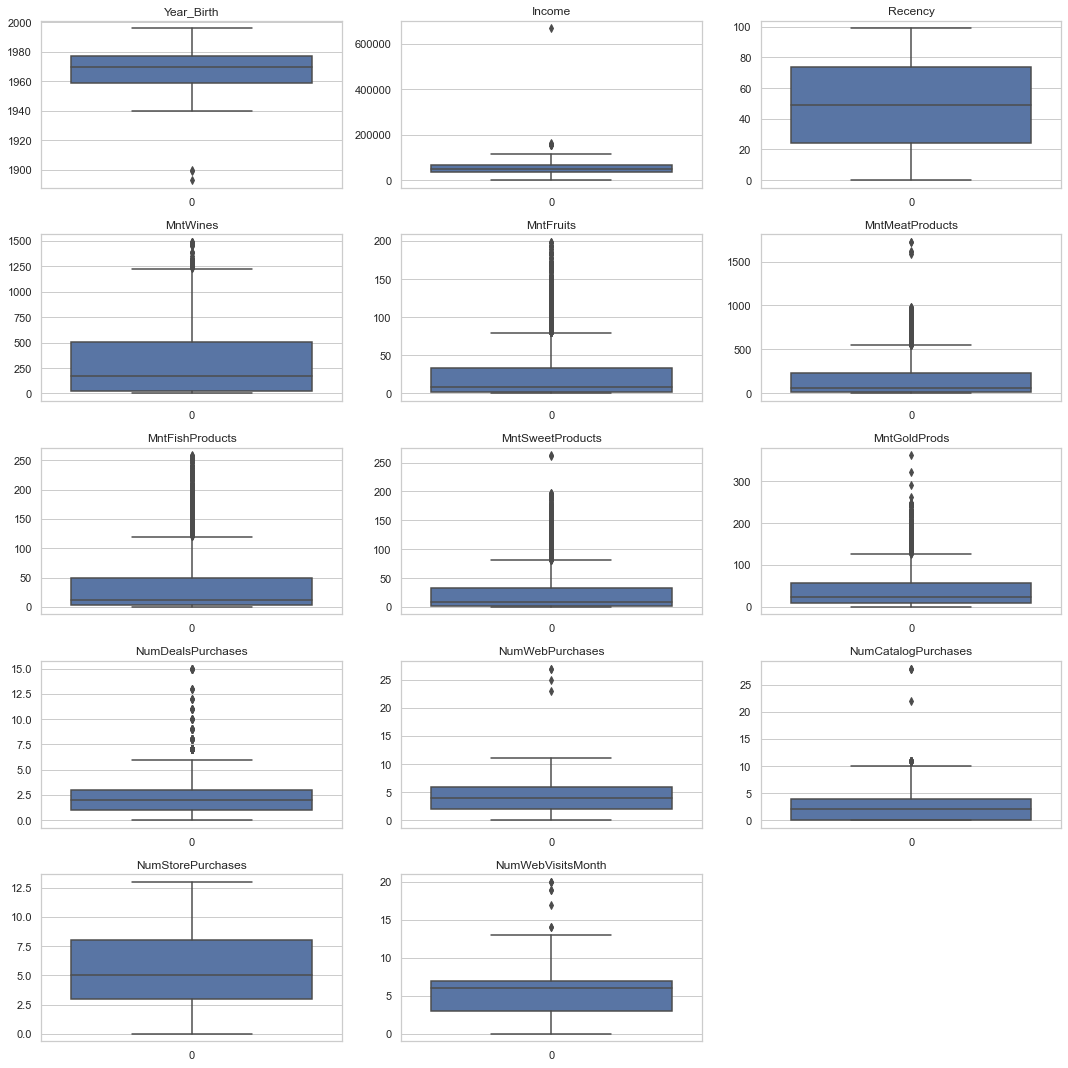

In [22]:
# Checking outliers using boxplot
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i=1
for x in num:
    ax = fig.add_subplot(5, 3, i)
    ax.set_title(x)
    sns.boxplot(data = df_num[x])     
    plt.tight_layout()
    i=i+1


<Figure size 720x360 with 0 Axes>

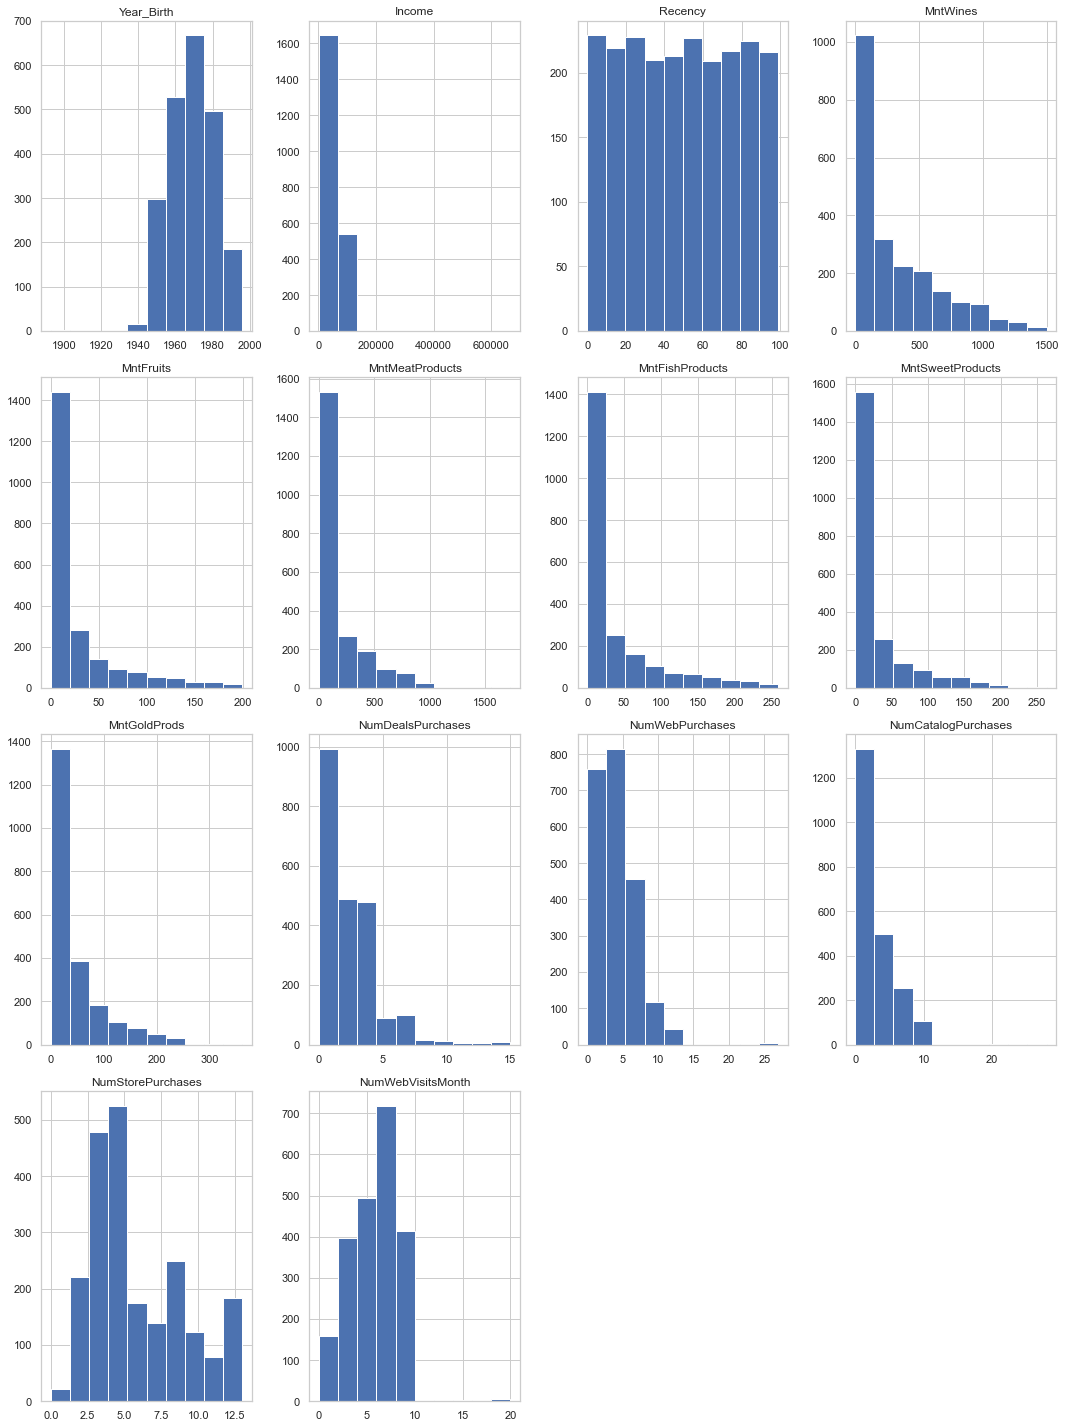

In [23]:
plt.figure(figsize=(10,5))
df_num.hist(figsize = (15,20))
plt.tight_layout()

# Bivariate Analysis

<AxesSubplot:>

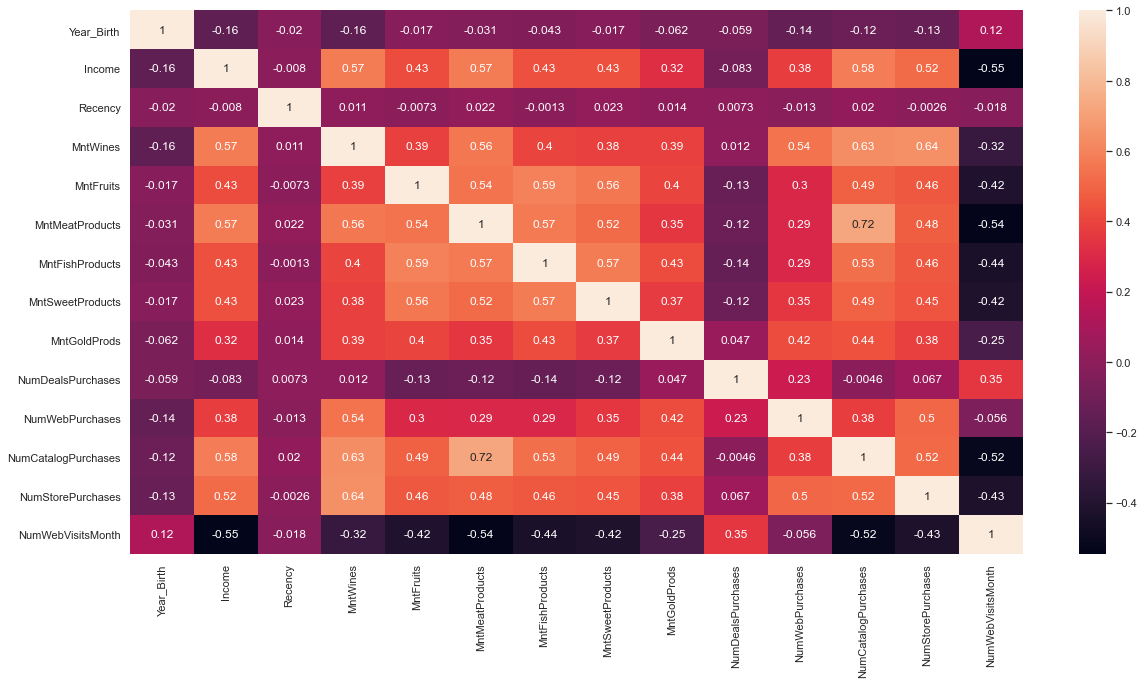

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(),annot=True)

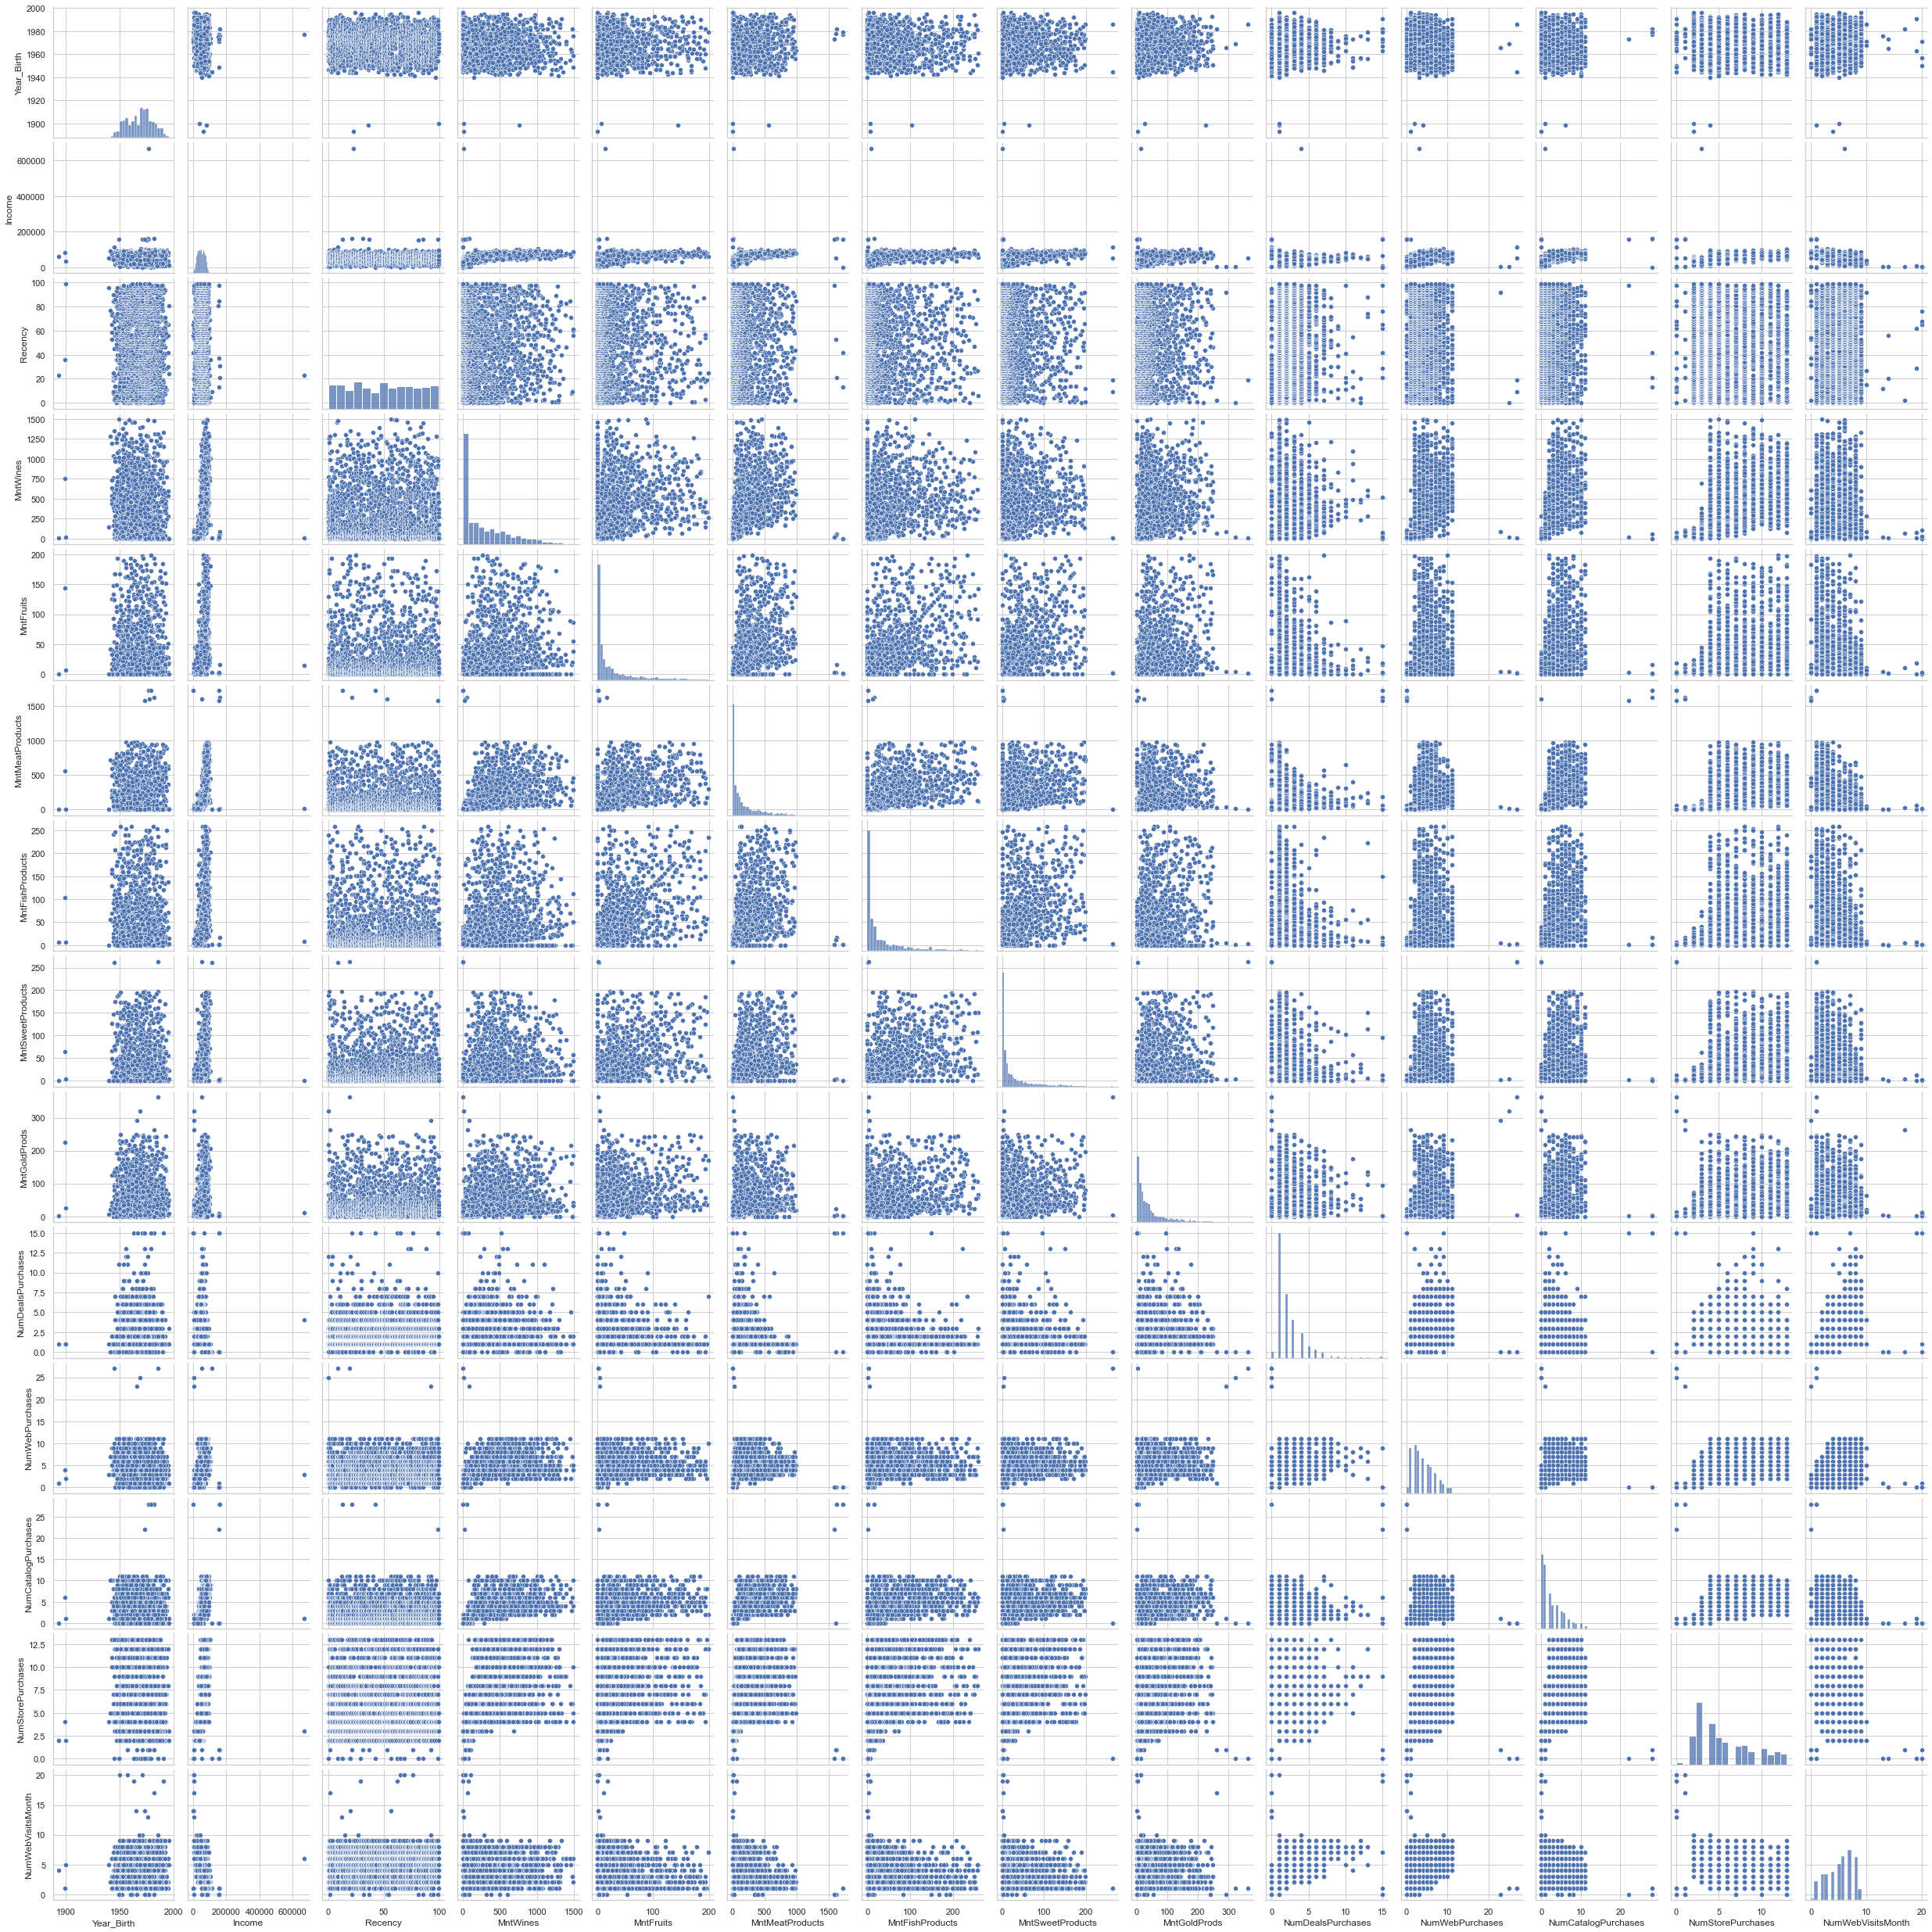

In [25]:
sns.pairplot(data[num])


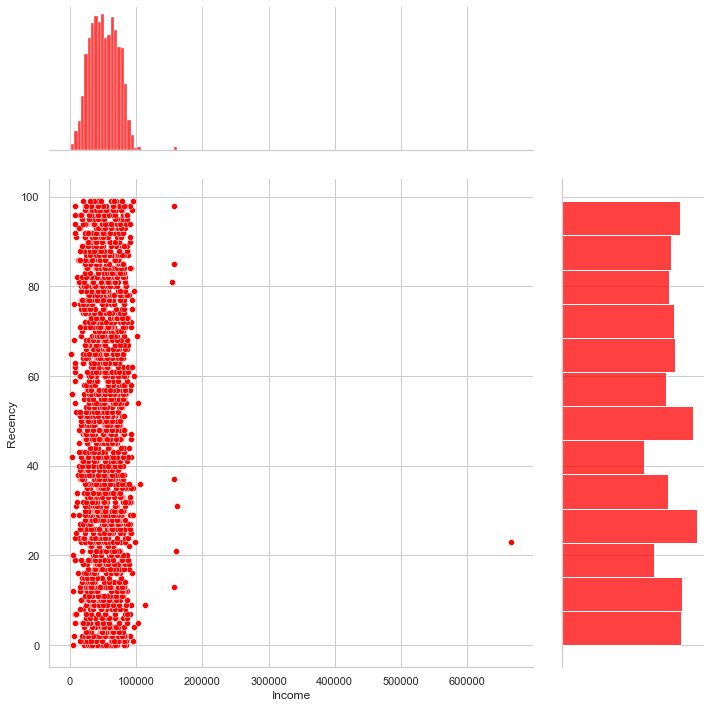

In [26]:
sns.jointplot(x="Income", y="Recency",  data=data, height=10, ratio=3, color="red")
plt.show()

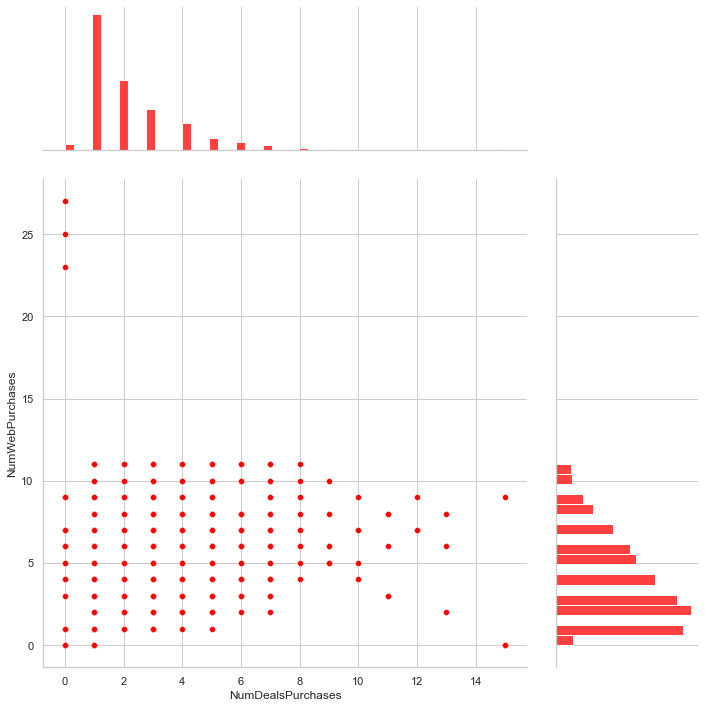

In [27]:
sns.jointplot(x="NumDealsPurchases", y="NumWebPurchases",  data=data, height=10, ratio=3, color="red")
plt.show()

**Performing basic pre-processing- Clip values**

In [28]:
df=df_num.copy()

In [29]:
# Handling Outliers - Clipping numerical values

# Min - 10 percentile, Max - 99 percentile

min_percentile = 1
max_percentile = 99.5

cols_for_clipping = ['Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

                     
for col in cols_for_clipping:
    #new_col = col + '_clipped'
    #new_features_df[new_col] = train_explore[col].values

    llimit = np.nanpercentile(df[col].values, min_percentile)  
    ulimit = np.nanpercentile(df[col].values, max_percentile) 
    df.loc[df[col] < llimit,[col]] = llimit
    df.loc[df[col] > ulimit,[col]] = ulimit

In [30]:
num

['Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

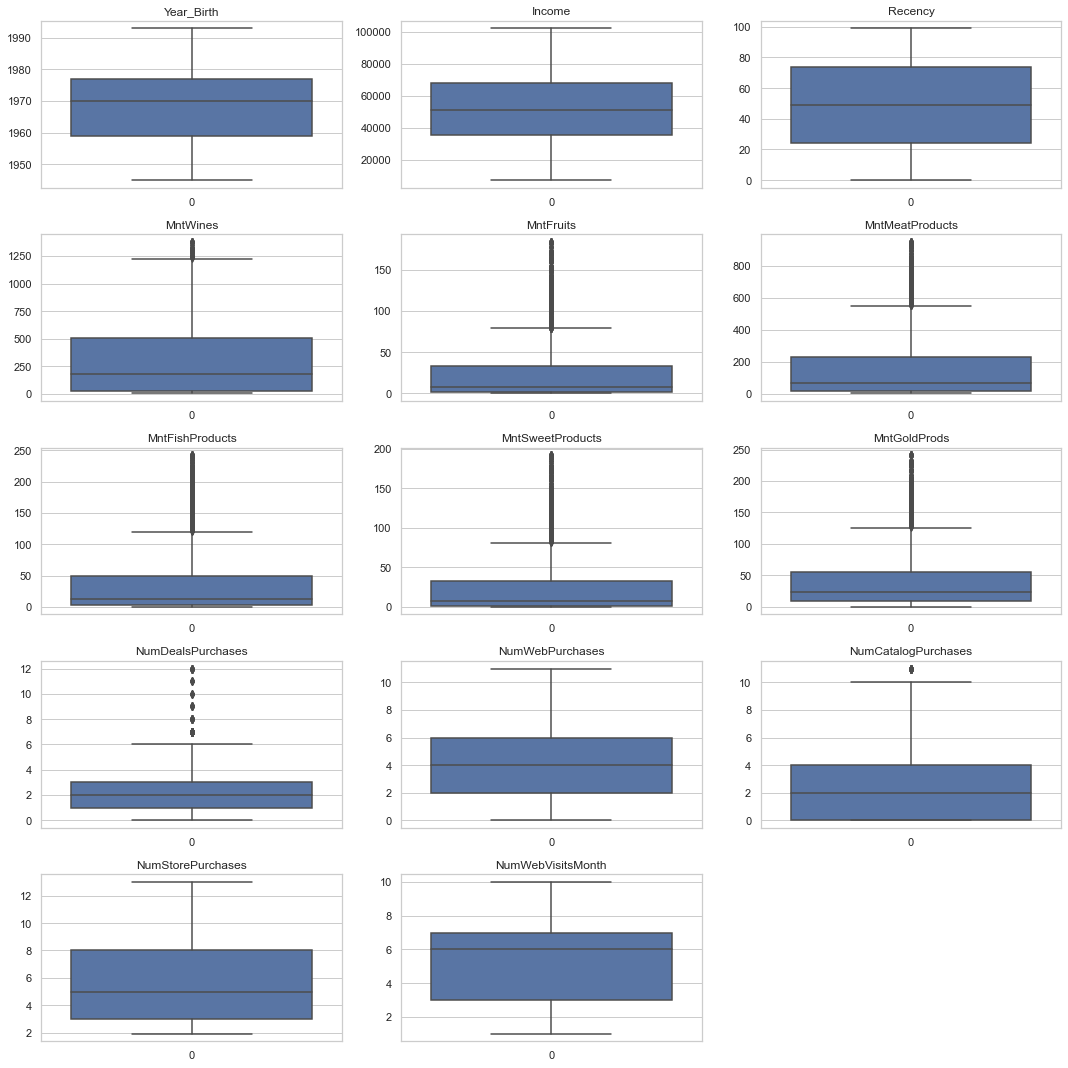

In [31]:
# Checking outliers using boxplot
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i=1
for x in num:
    ax = fig.add_subplot(5, 3, i)
    ax.set_title(x)
    sns.boxplot(data = df[x])     
    plt.tight_layout()
    i=i+1


### Exploring Categorical Variables

In [32]:
df_cat.head()

,Education,Marital_Status,Country
0,Graduation,Divorced,SP
1,Graduation,Single,CA
2,Graduation,Married,US
3,Graduation,Together,AUS
4,Graduation,Single,SP


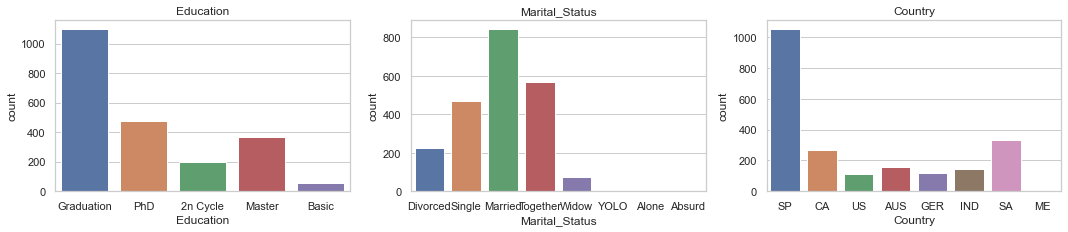

In [33]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i=1
for x in df_cat.columns:
    ax = fig.add_subplot(5, 3, i)
    ax.set_title(x)
    sns.countplot(df_cat[x])     
    plt.tight_layout()
    i=i+1



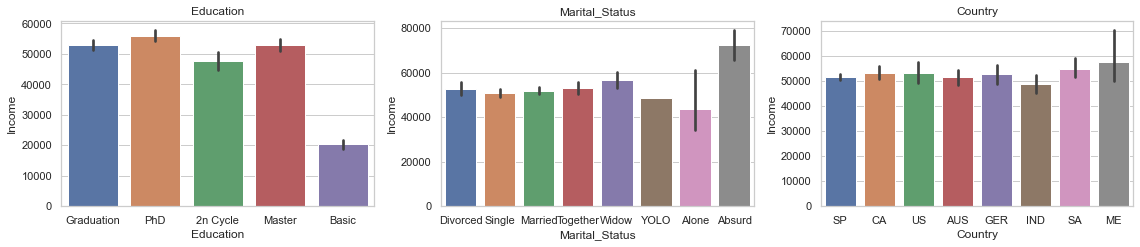

In [34]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i=1
for x in df_cat.columns:
    ax = fig.add_subplot(5, 3, i)
    ax.set_title(x)
    sns.barplot(x=data[x],y=data["Income"])  
    plt.tight_layout()
    i=i+1




In [35]:
Products = [col for col in df.columns if 'Mnt' in col]
Products_total = []
for i in range(0,6):
  print("{} = ${}".format(Products[i],df[Products[i]].sum(axis=0)))
  Products_total.append(df[Products[i]].sum(axis=0))

MntWines = $666114.6000000001
MntFruits = $57387.44
MntMeatProducts = $363317.0
MntFishProducts = $81980.76
MntSweetProducts = $59129.0
MntGoldProds = $96585.44


<AxesSubplot:>

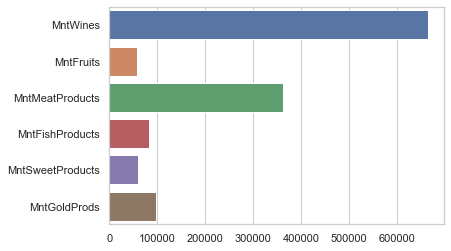

In [36]:
sns.barplot(x=Products_total, y=Products)

In [37]:
Purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
Purchases_total = []
for i in range(0,4):
  print("{} = {}".format(Purchases[i],df[Purchases[i]].sum(axis=0)))
  Purchases_total.append(df[Purchases[i]].sum(axis=0))

NumDealsPurchases = 5077.0
NumWebPurchases = 8924.0
NumCatalogPurchases = 5772.0
NumStorePurchases = 12721.240000000002


<AxesSubplot:>

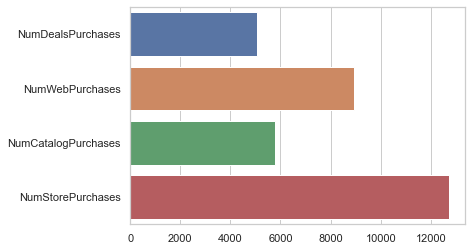

In [38]:
sns.barplot(x=Purchases_total, y=Purchases)

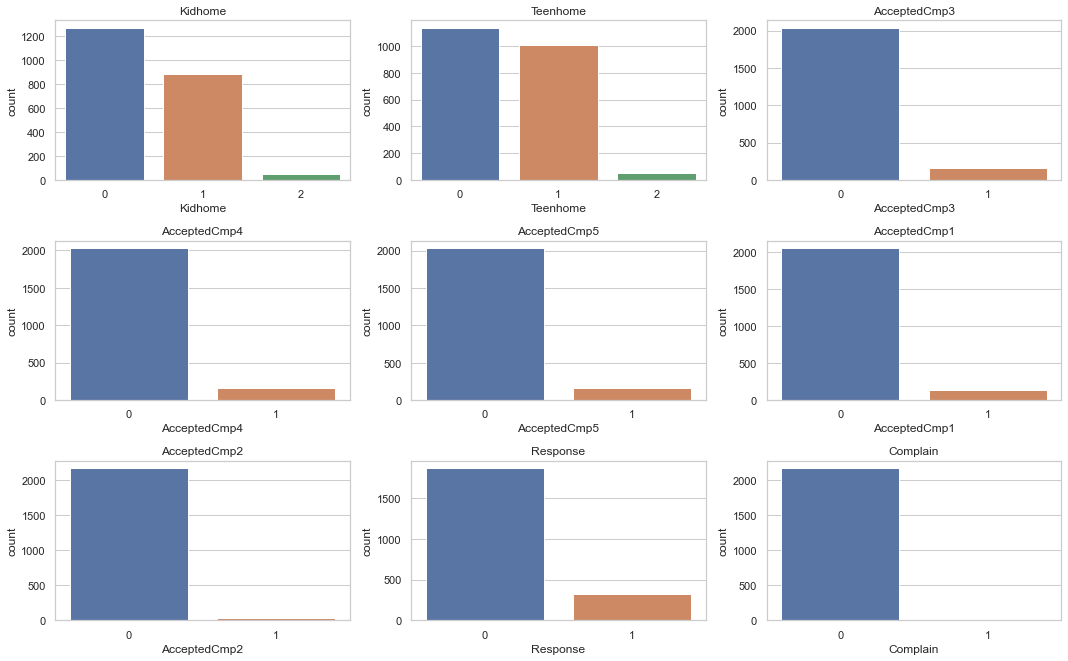

In [39]:
#categorical numerical column 
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i=1
for x in df_cat_num.columns:
    ax = fig.add_subplot(5, 3, i)
    ax.set_title(x)
    sns.countplot(df_cat_num[x])     
    plt.tight_layout()
    i=i+1



# Observations

In [42]:
Products

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [43]:
Purchases

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

In [49]:
df2 = data.copy()
df2["AmountSpent"] = df[Products].sum(axis=1)
df2["PurchasesMade"] = df[Purchases].sum(axis=1)

#### Customer segregation based on dependents

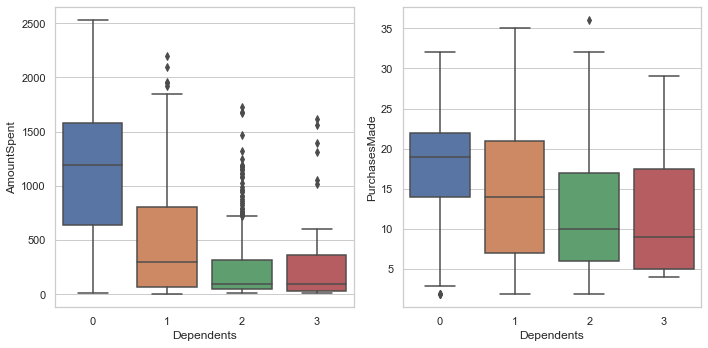

In [50]:
df2["Dependents"] = df2["Kidhome"] + df2["Teenhome"]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df2["AmountSpent"],x=df2["Dependents"])
plt.subplot(1,2,2)
sns.boxplot(y=df2["PurchasesMade"],x=df2["Dependents"])
plt.tight_layout()

#### Customer segregation based on Age

In [58]:
df2["Age"] = pd.datetime.today().year - df["Year_Birth"]

In [67]:
df2["Age_category"] = df2['Age'].apply(lambda x: 'Senior Citizen' if x >= 60 else 'Adult' if x > 28 else 'Youth')

<AxesSubplot:xlabel='Age_category', ylabel='count'>

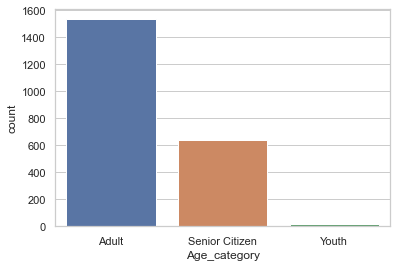

In [68]:
sns.countplot(x=df2["Age_category"])

In [69]:
df2["Age_category"].value_counts()

Adult             1535
Senior Citizen     643
Youth               15
Name: Age_category, dtype: int64

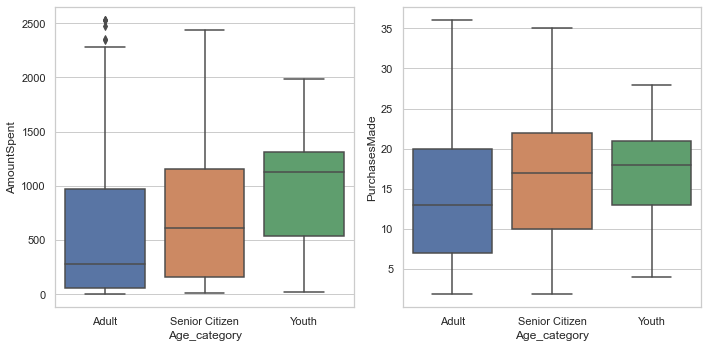

In [70]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df2["AmountSpent"],x=df2["Age_category"])
plt.subplot(1,2,2)
sns.boxplot(y=df2["PurchasesMade"],x=df2["Age_category"])
plt.tight_layout()

#### Market Segregation based on country

In [76]:
data["AmountSpent"] = data[Products].sum(axis=1)
data["PurchasesMade"] = data[Purchases].sum(axis=1)

In [77]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,AmountSpent,PurchasesMade
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,0,0,0,0,0,1,0,SP,1190,15
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,0,0,0,0,1,1,0,CA,577,18
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,0,0,0,0,0,0,0,US,251,11
3,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,...,0,0,0,0,0,0,0,AUS,11,4
4,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,...,1,0,0,0,0,1,0,SP,91,8


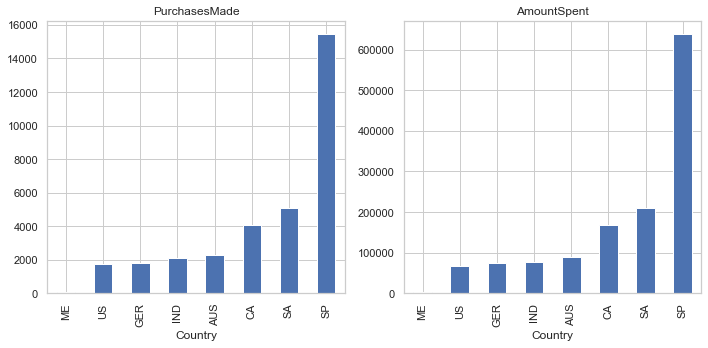

In [79]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data.groupby('Country')["PurchasesMade"].sum().sort_values().plot(kind='bar')
plt.title("PurchasesMade")
plt.subplot(1,2,2)
data.groupby('Country')["AmountSpent"].sum().sort_values().plot(kind='bar')
plt.title("AmountSpent")
plt.tight_layout()
